# PESQUISA DE CRIMES DE ÓDIO NOS EUA DE 2014 A 2016

###ALUNA: DÉBORA CRISTINA SANTOS 
#TURMA: B - TERCEIRO PERIODO
#FONTE DOS DADOS: https://crime-data-explorer.fr.cloud.gov/downloads-and-docs
#DATA BASE: FBI HATE CRIME
#ANO: 2014, 2015 E 2016


# IMPORTANDO OS MODULOS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
low_memory = False

pd.options.display.max_columns = 80



# LENDO O ARQUIVO XLSX

In [32]:
df= pd.read_excel('FBICRIMES.xlsx', sheet_name='FBI_CRIMES')
df.info()
df
print (df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9108 entries, 0 to 9107
Data columns (total 9 columns):
ANO                    9108 non-null int64
CIDADE                 9108 non-null object
ESTADO                 9108 non-null object
REGIAO                 9108 non-null object
RACA_DO_OFENSOR        9108 non-null object
QTD_DE_VITIMAS         9108 non-null int64
TIPO_DE_CRIME          9108 non-null object
LOCAL_DO_CRIME         9108 non-null object
TIPO_DE_PRECONCEITO    9108 non-null object
dtypes: int64(2), object(7)
memory usage: 640.5+ KB
    ANO                  CIDADE        ESTADO   REGIAO RACA_DO_OFENSOR  \
0  2014                  Dallas         Texas    South           White   
1  2014                  Dallas         Texas    South         Unknown   
2  2014             Grand Forks  North Dakota  Midwest        Multiple   
3  2014                  Camden     Tennessee    South           White   
4  2014  Ohio State University:          Ohio  Midwest         Unknown   

   

# AGRUPANDO OS DADOS POR TIPO DE PRECONCEITO

In [4]:
groupby_TIPO_DE_PRECONCEITO = df.groupby('TIPO_DE_PRECONCEITO')
groupby_TIPO_DE_PRECONCEITO.groups

{'Anti-Black or African American': Int64Index([   1,    2,    4,    5,    6,    9,   10,   11,   13,   14,
             ...
             9089, 9090, 9093, 9095, 9098, 9100, 9101, 9102, 9103, 9106],
            dtype='int64', length=5170),
 'Anti-Gay (Male)': Int64Index([   0,    8,   17,   20,   23,   24,   28,   35,   46,   47,
             ...
             9038, 9041, 9069, 9070, 9082, 9091, 9094, 9096, 9097, 9104],
            dtype='int64', length=1977),
 'Anti-White': Int64Index([   3,    7,   12,   15,   26,   29,   30,   31,   45,   57,
             ...
             9079, 9080, 9083, 9084, 9087, 9088, 9092, 9099, 9105, 9107],
            dtype='int64', length=1961)}

# QTD DE CRIMES POR ANO X TIPOS DE PRECONCEITO

In [34]:
qtdcrimes = df.groupby(['ANO','TIPO_DE_PRECONCEITO']).TIPO_DE_PRECONCEITO.count().reset_index(name="count")
print(qtdcrimes.sort_values(by='count', ascending=True))

    ANO             TIPO_DE_PRECONCEITO  count
2  2014                      Anti-White    610
1  2014                 Anti-Gay (Male)    612
5  2015                      Anti-White    613
4  2015                 Anti-Gay (Male)    676
7  2016                 Anti-Gay (Male)    689
8  2016                      Anti-White    738
0  2014  Anti-Black or African American   1647
3  2015  Anti-Black or African American   1755
6  2016  Anti-Black or African American   1768


# O PICO DE CRIMES DE ODIOS FOI NA CALIFORNIA EM 2016 COM 459 OCORRENCIAS

In [146]:
ocor = df.groupby(['ANO','ESTADO']).ESTADO.count().sort_values().reset_index(name="QTD")

est = ocor.drop_duplicates('ESTADO')
est.ANO
lista_temp=[]
for w in est.index:
    lista_por_cidade = ocor[(ocor.ESTADO == est.ESTADO[w])]
    lista_temp.append(lista_por_cidade.loc[lista_por_cidade['QTD'].idxmax()])

lt = pd.DataFrame(lista_temp)
lt = lt.sort_values(by='QTD', ascending=False)
lt

,ANO,ESTADO,QTD
146,2016,California,459
143,2016,Michigan,269
142,2016,Ohio,248
139,2016,Washington,204
137,2014,New York,196
136,2015,Massachusetts,190
130,2015,Arizona,169
129,2014,New Jersey,168
122,2016,Kentucky,115
120,2015,Tennessee,105


# CONSTANDO QUE O CRIME DE ODIO CONTRA NEGROS E AFRO AMERICANOS TEVE SEU PICO EM 2016, ATINGINDO 1768 OCORRENCIAS.

In [38]:
qtdcrimes = df.groupby(['ANO','TIPO_DE_PRECONCEITO']).TIPO_DE_PRECONCEITO.count().reset_index(name="count")
qtdcrimes[qtdcrimes['count'] == qtdcrimes['count'].max()]

,ANO,TIPO_DE_PRECONCEITO,count
6,2016,Anti-Black or African American,1768


# CONTAGEM DE OCORRENCIAS POR ESTADOS

In [149]:
try2 = qtdcrimes.drop_duplicates('ESTADO')
try2 = try2.sort_values(by='ESTADO')
try2.ESTADO


0                    Alabama
5                     Alaska
11                   Arizona
37                  Arkansas
44                California
277                 Colorado
326              Connecticut
378                 Delaware
388     District of Columbia
390                  Florida
450                  Georgia
458                    Idaho
473                 Illinois
548                  Indiana
565                     Iowa
578                   Kansas
639                 Kentucky
754                Louisiana
773                    Maine
796                 Maryland
813            Massachusetts
918                 Michigan
1119               Minnesota
1157             Mississippi
1159                Missouri
1201                 Montana
1220                Nebraska
1228                  Nevada
1234           New Hampshire
1257              New Jersey
1399              New Mexico
1403                New York
1458          North Carolina
1523            North Dakota
1543          

In [88]:
try3 = qtdcrimes.drop_duplicates('CIDADE')
try3 = try2.sort_values(by='CIDADE',ascending=True) 
try3.CIDADE




2179                                 Aberdeen
1852                                 Aberdeen
1257                        Aberdeen Township
1763     Abington Township, Montgomery County
2096                                 Accomack
813                                     Acton
639                                     Adair
277                                     Adams
44                                   Adelanto
918                                    Adrian
1543                                    Akron
390                                   Alachua
1954                  Alamo Colleges District
1403                                   Albany
1399                              Albuquerque
1866                                    Alcoa
473                                 Algonquin
1703                                 Anadarko
5                                   Anchorage
548                                  Anderson
1800                                 Anderson
796     Anne Arundel County Police

# % TOP 3 CRIMES DE ODIO REPORTADOS NOS EUA (2014-2016)

<function matplotlib.pyplot.show(*args, **kw)>

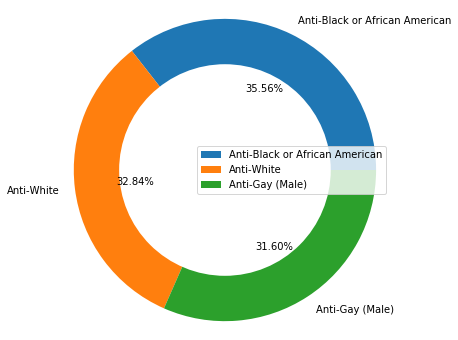

In [167]:
df1 = df.groupby(['ESTADO','TIPO_DE_PRECONCEITO','ANO']).TIPO_DE_PRECONCEITO.count().reset_index(name="QTD")
df1.TIPO_DE_PRECONCEITO.value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), legend='false' )
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.axis('off')
plt.legend(loc="right")
plt.show


# QUANTIDADE DE CRIMES DE ODIO CONTRA NEGROS (2014-2016)

In [124]:
df1 = df.groupby(['ANO','TIPO_DE_PRECONCEITO']).TIPO_DE_PRECONCEITO.count().reset_index(name="count_peri")
est = df1.drop_duplicates('ANO')
est.ANO
lista_temp=[]
for w in est.index:
    lista_por_ano = df1[(df1.ANO == est.ANO[w])]
    lista_temp.append(lista_por_ano.loc[lista_por_ano['count_peri'].idxmax()])

lt = pd.DataFrame(lista_temp)
lt = lt.sort_values(by='count_peri', ascending=True)
lt

,ANO,TIPO_DE_PRECONCEITO,count_peri
0,2014,Anti-Black or African American,1647
3,2015,Anti-Black or African American,1755
6,2016,Anti-Black or African American,1768


# TOP 3 CRIMES DE ODIO REPORTADOS NOS EUA (2014-2016)

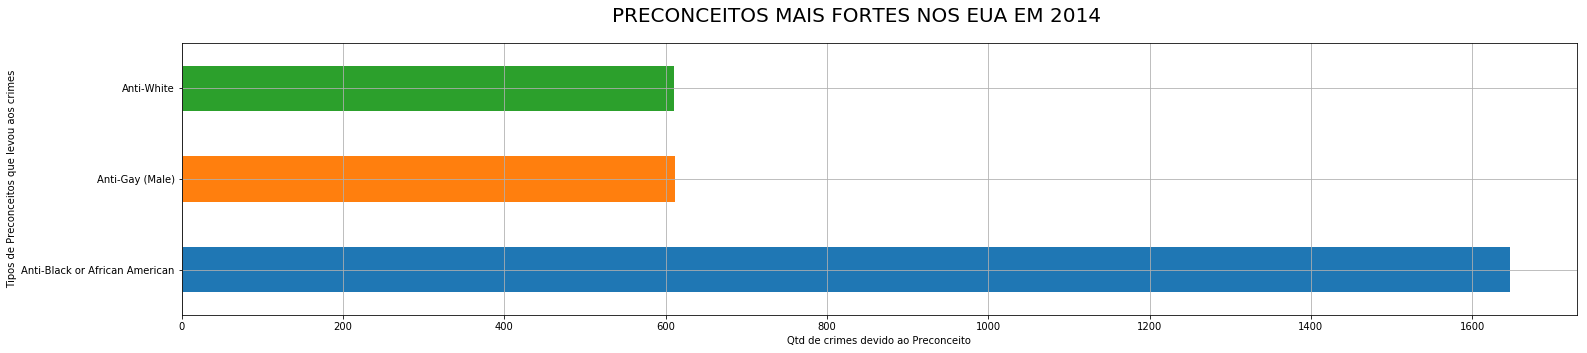

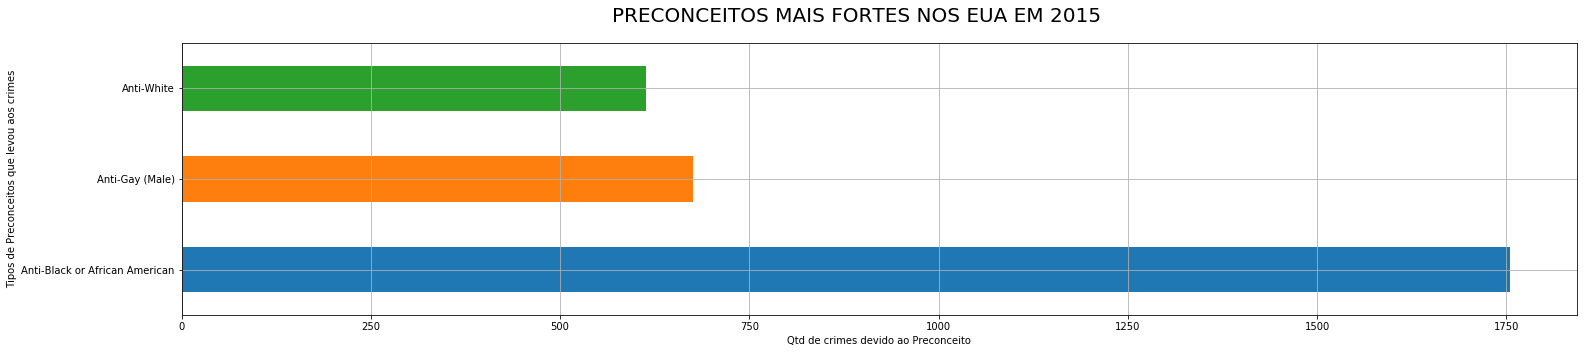

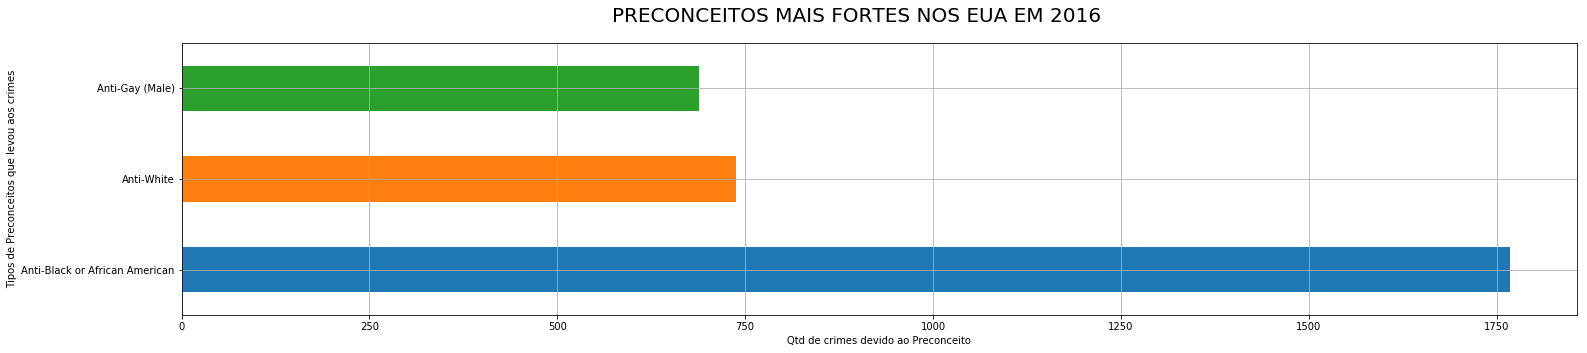

In [104]:

df.query('ANO == "2014"')['TIPO_DE_PRECONCEITO'].value_counts().plot(kind='barh',figsize=(25, 5))
plt.suptitle('PRECONCEITOS MAIS FORTES NOS EUA EM 2014', size=20)
plt.xlabel("Qtd de crimes devido ao Preconceito")
plt.ylabel("Tipos de Preconceitos que levou aos crimes")
plt.grid(True)
plt.show()

df.query('ANO == "2015"')['TIPO_DE_PRECONCEITO'].value_counts().plot(kind='barh',figsize=(25, 5))
plt.suptitle('PRECONCEITOS MAIS FORTES NOS EUA EM 2015', size=20)
plt.xlabel("Qtd de crimes devido ao Preconceito")
plt.ylabel("Tipos de Preconceitos que levou aos crimes")
plt.grid(True)
plt.show()

df.query('ANO == "2016"')['TIPO_DE_PRECONCEITO'].value_counts().plot(kind='barh',figsize=(25, 5))
plt.suptitle('PRECONCEITOS MAIS FORTES NOS EUA EM 2016', size=20)
plt.xlabel("Qtd de crimes devido ao Preconceito")
plt.ylabel("Tipos de Preconceitos que levou aos crimes")
plt.grid(True)
plt.show()